In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso

In [11]:
boston=load_boston()
df= pd.DataFrame(boston.data, columns=boston.feature_names)
df['price']=boston.target

C:\Anaconda\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func

In [ ]:
#polynomial regression

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# load the dataset
data=pd.read_csv('claim_per_policy.csv')
data

,Age,Claim per policy
0,15,31177
1,20,34086
2,25,36867
3,30,42452
4,35,44681
5,40,46986
6,45,46033
7,50,47341
8,55,48762
9,60,52408


In [14]:
data.head()

,Age,Claim per policy
0,15,31177
1,20,34086
2,25,36867
3,30,42452
4,35,44681


In [15]:
data.tail()

,Age,Claim per policy
7,50,47341
8,55,48762
9,60,52408
10,65,58741
11,70,75856


In [16]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1:].values
print(type(X),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [17]:
a=data.Age
b=data['Claim per policy']
print(type(a),type(b))

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [18]:
data.shape

(12, 2)

In [19]:
X

array([[15],
       [20],
       [25],
       [30],
       [35],
       [40],
       [45],
       [50],
       [55],
       [60],
       [65],
       [70]], dtype=int64)

In [20]:
y

array([[31177],
       [34086],
       [36867],
       [42452],
       [44681],
       [46986],
       [46033],
       [47341],
       [48762],
       [52408],
       [58741],
       [75856]], dtype=int64)

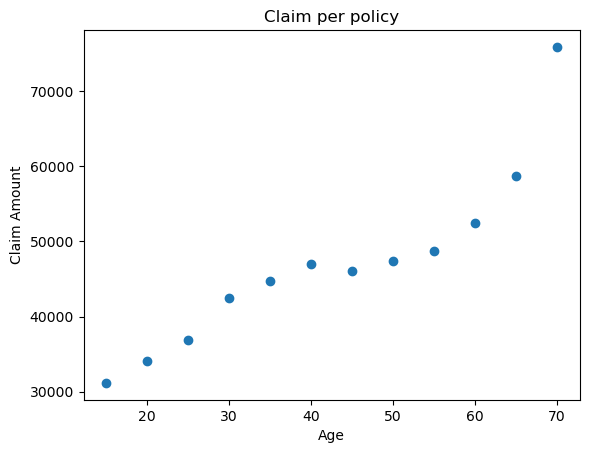

In [21]:
#visualize dataset
plt.scatter(X,y)
plt.title('Claim per policy')
plt.xlabel('Age')
plt.ylabel('Claim Amount')
plt.show()

In [24]:
#Simple Linear regression for the entire datset (For Comparision)
from sklearn.linear_model import LinearRegression
base_reg=LinearRegression()
base_reg.fit(X,y)
print('Coefficient-M: \t', base_reg.coef_)
print()
print('Intercept- C:\t', base_reg.intercept_)

Coefficient-M: 	 [[601.90769231]]

Intercept- C:	 [21534.75641026]


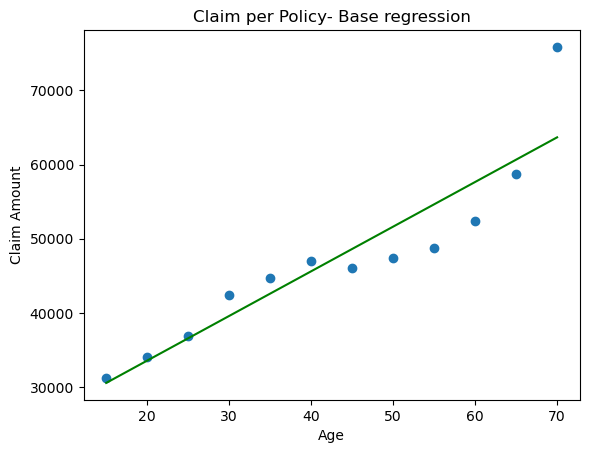

In [25]:
#Visualize base model regression line
plt.scatter(X,y)
plt.plot(X, base_reg.predict(X), color='green')
plt.title('Claim per Policy- Base regression')
plt.xlabel('Age')
plt.ylabel('Claim Amount')
plt.show()

In [ ]:
#Polynomial based Linear regression

In [30]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression

poly_features=PolynomialFeatures(degree=2)
X_poly=poly_features.fit_transform(X)
y_poly=poly_features.fit_transform(y)

#Call Linear regression and aggign to poly_reg variable
poly_reg=LinearRegression()
poly_reg.fit(X_poly,y)
print('Coefficient-M: \t', poly_reg.coef_)
print()
print('Intercept- C:\t', poly_reg.intercept_)

Coefficient-M: 	 [[  0.         -95.94485514   8.21002997]]

Intercept- C:	 [33918.21828172]


In [31]:
X

array([[15],
       [20],
       [25],
       [30],
       [35],
       [40],
       [45],
       [50],
       [55],
       [60],
       [65],
       [70]], dtype=int64)

In [32]:
X_poly

array([[1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 2.000e+01, 4.000e+02],
       [1.000e+00, 2.500e+01, 6.250e+02],
       [1.000e+00, 3.000e+01, 9.000e+02],
       [1.000e+00, 3.500e+01, 1.225e+03],
       [1.000e+00, 4.000e+01, 1.600e+03],
       [1.000e+00, 4.500e+01, 2.025e+03],
       [1.000e+00, 5.000e+01, 2.500e+03],
       [1.000e+00, 5.500e+01, 3.025e+03],
       [1.000e+00, 6.000e+01, 3.600e+03],
       [1.000e+00, 6.500e+01, 4.225e+03],
       [1.000e+00, 7.000e+01, 4.900e+03]])

In [33]:
X_poly.shape

(12, 3)

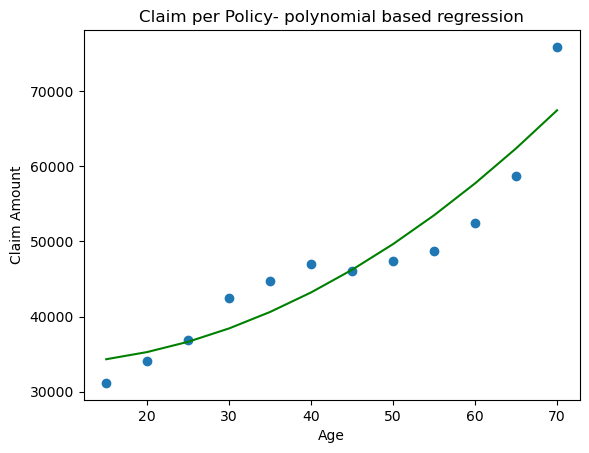

In [34]:
#Visualize base polynomial based regression line
plt.scatter(X,y)
plt.plot(X, poly_reg.predict(X_poly), color='green')
plt.title('Claim per Policy- polynomial based regression')
plt.xlabel('Age')
plt.ylabel('Claim Amount')
plt.show()

Coefficient-M: 	 [[ 0.00000000e+00  4.32172728e+03 -1.07033591e+02  9.03871536e-01]]

Intercept- C:	 [-15060.32056896]


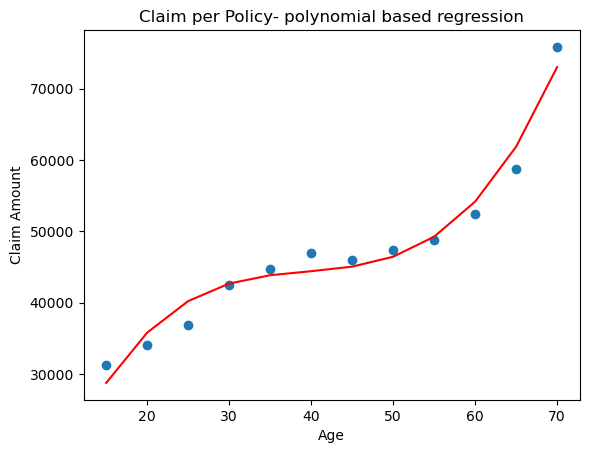

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features=PolynomialFeatures(degree=3)
X_poly=poly_features.fit_transform(X)
y_poly=poly_features.fit_transform(y)

#Call Linear regression and aggign to poly_reg variable
poly_reg=LinearRegression ()
poly_reg.fit(X_poly,y)
print("Coefficient-M: \t", poly_reg.coef_)
print()
print('Intercept- C:\t', poly_reg.intercept_)
#Visualize base polynomial based regression Line
plt.scatter(X,y)
plt.plot(X,poly_reg.predict(X_poly), color='red')
plt.title('Claim per Policy- polynomial based regression')
plt.xlabel('Age')
plt.ylabel('Claim Amount')
plt.show()

Coefficient-M:	 [[ 0.00000000e+00 -4.22930312e+03  2.47325524e+02 -5.06692276e+00
   3.51223194e-02]]

Intercept- C:	 [54331.34758006]


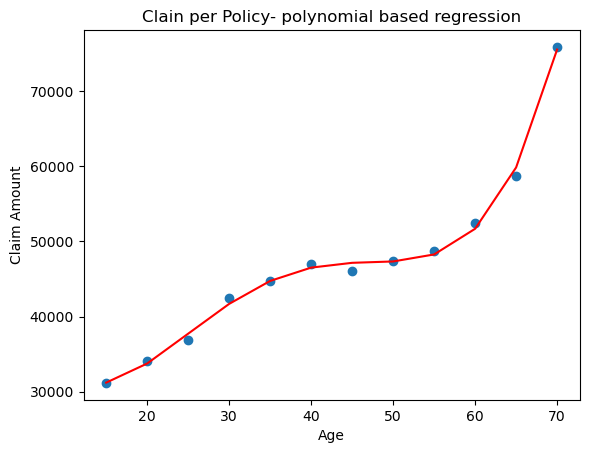

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 

poly_features=PolynomialFeatures(degree=4)
X_poly=poly_features.fit_transform(X)
y_poly=poly_features.fit_transform(y)

#Call Linear regression and aggign to poly_reg variable
poly_reg=LinearRegression()
poly_reg.fit(X_poly,y)
print("Coefficient-M:\t", poly_reg.coef_)
print()
print('Intercept- C:\t',poly_reg.intercept_)
#Visualize base polynomial based regression Line
plt.scatter (X,y)
plt.plot(X, poly_reg.predict(X_poly), color="red")
plt.title('Clain per Policy- polynomial based regression')
plt.xlabel('Age')
plt.ylabel('Claim Amount')
plt.show()

Coefficient-M:	 [[ 0.00000000e+00 -4.22930312e+03  2.47325524e+02 -5.06692276e+00
   3.51223194e-02]]

Intercept- C:	 [54331.34758006]


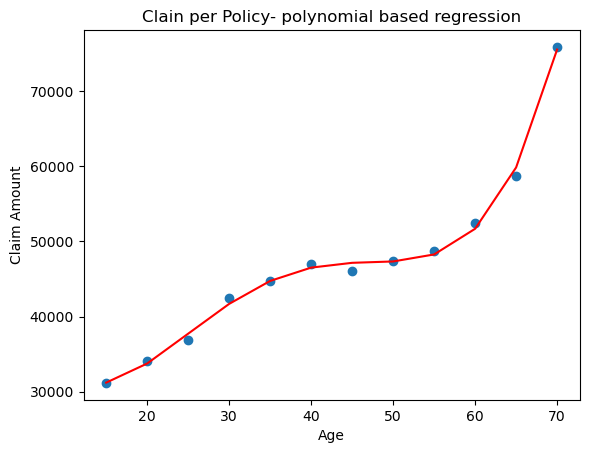

In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 

poly_features=PolynomialFeatures(degree=4)
X_poly=poly_features.fit_transform(X)
y_poly=poly_features.fit_transform(y)

#Call Linear regression and aggign to poly_reg variable
poly_reg=LinearRegression()
poly_reg.fit(X_poly,y)
print("Coefficient-M:\t",poly_reg.coef_)
print()
print('Intercept- C:\t',poly_reg.intercept_)
#Visualize base polynomial based regression Line
plt.scatter (X,y)
plt.plot(X, poly_reg.predict(X_poly), color="red")
plt.title('Clain per Policy- polynomial based regression')
plt.xlabel('Age')
plt.ylabel('Claim Amount')
plt.show()